In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import math
from scipy.stats import pearsonr

warnings.filterwarnings('ignore')

In [2]:
household = pd.read_csv('C:/Users/Seant/Desktop/aml_data/hhpub.csv')
person = pd.read_csv('C:/Users/Seant/Desktop/aml_data/perpub.csv')
veh = pd.read_csv('C:/Users/Seant/Desktop/aml_data/vehpub.csv')
trip= pd.read_csv('C:/Users/Seant/Desktop/aml_data/trippub.csv')

In [3]:
# as only studying hh with car will also filter out hh with HHVEHCNT == 0
ny = household[household['HHSTATE'] =="NY"]
ny = ny[ny['HHVEHCNT']>0]

In [4]:
def cat_col_prop(data, col):
    print(pd.concat([data[col].value_counts(),
          data[col].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage')))

    sns.histplot(data[col])

## 1. Household

In [5]:
#15636 households in NY with at least one vehicle
ny.shape

(15636, 58)

In [6]:
ny.columns

Index(['HOUSEID', 'TRAVDAY', 'SAMPSTRAT', 'HOMEOWN', 'HHSIZE', 'HHVEHCNT',
       'HHFAMINC', 'PC', 'SPHONE', 'TAB', 'WALK', 'BIKE', 'CAR', 'TAXI', 'BUS',
       'TRAIN', 'PARA', 'PRICE', 'PLACE', 'WALK2SAVE', 'BIKE2SAVE', 'PTRANS',
       'HHRELATD', 'DRVRCNT', 'CNTTDHH', 'HHSTATE', 'HHSTFIPS', 'NUMADLT',
       'YOUNGCHILD', 'WRKCOUNT', 'TDAYDATE', 'HHRESP', 'LIF_CYC', 'MSACAT',
       'MSASIZE', 'RAIL', 'URBAN', 'URBANSIZE', 'URBRUR', 'SCRESP', 'CENSUS_D',
       'CENSUS_R', 'CDIVMSAR', 'HH_RACE', 'HH_HISP', 'HH_CBSA', 'RESP_CNT',
       'WEBUSE17', 'SMPLSRCE', 'WTHHFIN', 'HBHUR', 'HTHTNRNT', 'HTPPOPDN',
       'HTRESDN', 'HTEEMPDN', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN'],
      dtype='object')

min value: 0 should keep these values too 1411 occurences of total 15636 ( 9.024047070862114 %)


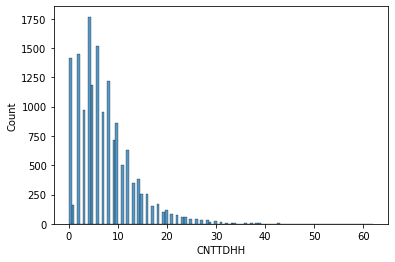

In [7]:
# label - cause of the zero values may not be able to log
sns.histplot(ny['CNTTDHH'])
print("min value:",str(min(ny['CNTTDHH'])),"should keep these values too",str(sum(ny['CNTTDHH']==0)), "occurences of total", len(ny), "(", str(sum(ny['CNTTDHH']==0)/len(ny)*100),"%)" )


### MSACAT

   counts  percentage
3    6936   44.359171
1    4384   28.037861
4    2635   16.852136
2    1681   10.750831


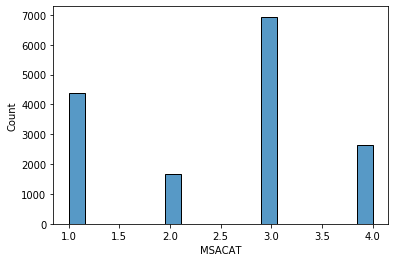

In [8]:
ny['MSACAT'].value_counts()

cat_col_prop(ny,'MSACAT')


   counts  percentage
5    4384   28.037861
1    4067   26.010489
6    2635   16.852136
3    2135   13.654387
4    1681   10.750831
2     734    4.694295


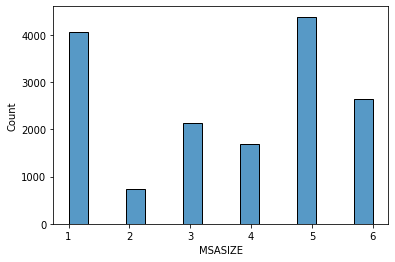

In [9]:
ny['MSASIZE'].value_counts()

cat_col_prop(ny,'MSASIZE')

    counts  percentage
23    6933   44.339985
21    4380   28.012279
24    2634   16.845741
22    1680   10.744436
51       3    0.019186
13       2    0.012791
33       1    0.006395
52       1    0.006395
54       1    0.006395
31       1    0.006395


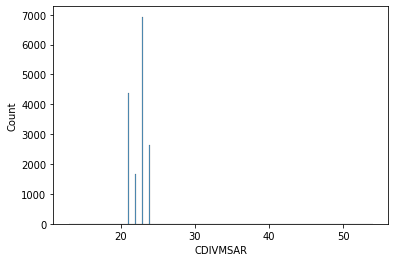

In [10]:
ny['CDIVMSAR'].value_counts()

cat_col_prop(ny,'CDIVMSAR')

### Core Based Statistical Area FIPS code

       counts  percentage
XXXXX    9571   61.211307
35620    4384   28.037861
40380     902    5.768739
15380     779    4.982093


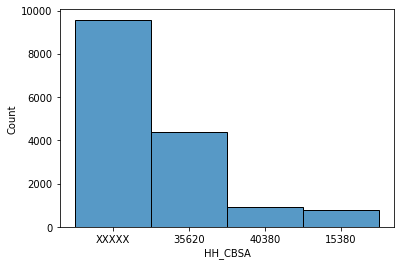

In [11]:
ny['HH_CBSA'].value_counts()

cat_col_prop(ny,'HH_CBSA')

# significant number of households under the 'XXXXX=Suppressed, in an MSA of less than 1 million ' category

In [12]:
ny.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
2,30000012,5,3,1,1,2,10,1,1,3,...,2,79.419586,C,80,17000,17000,5000,60,17000,7000
8,30000082,3,3,2,4,2,8,1,1,5,...,2,1148.809332,T,20,1500,300,750,30,750,300
15,30000130,1,1,1,2,1,5,-9,1,-9,...,1,3829.959655,U,60,30000,17000,5000,70,30000,17000
39,30000380,2,3,2,3,1,3,1,1,2,...,2,370.744472,S,50,3000,1500,1500,50,3000,1500
44,30000434,7,3,1,2,2,8,1,1,3,...,2,101.472420,R,30,1500,750,750,30,750,300


### Travel Dayof Week Lower

In [13]:
#relatively equal number of days of the week
ny['TRAVDAY'].value_counts()

2    2274
5    2269
1    2251
7    2247
6    2228
3    2203
4    2164
Name: TRAVDAY, dtype: int64

### Home ownership

     counts  percentage
 1    12796   81.836787
 2     2722   17.408544
 97     117    0.748273
-7        1    0.006395


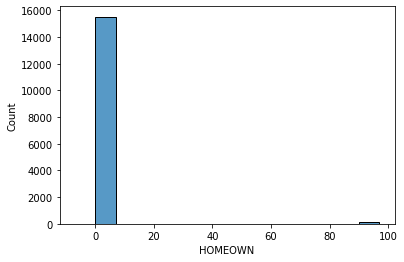

In [14]:
# Majority Own home while 17 percent rent the rest to replace with 'NA' (to remove while one hot encoding)

cat_col_prop(ny,'HOMEOWN')

ny['HOMEOWN'] = ny['HOMEOWN'].replace({1:"HOME_OWN",
                                       2: "HOME_RENT",
                                      97: "NA",
                                      -7: "NA"})

### HHVEHCTN

    counts  percentage
2     6334   40.509082
1     5821   37.228191
3     2257   14.434638
4      795    5.084421
5      281    1.797135
6       92    0.588386
7       34    0.217447
8       12    0.076746
9        6    0.038373
11       2    0.012791
12       2    0.012791
________
new HHVEHCNT
    counts  percentage
2     6334   40.509082
1     5821   37.228191
>2    3481   22.262727


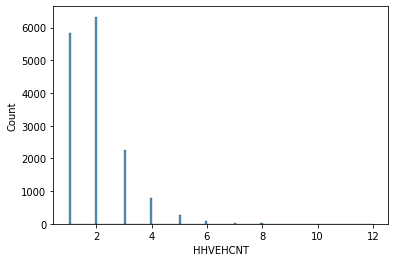

In [15]:
cat_col_prop(ny,'HHVEHCNT')

ny['HHVEHCNT'][ny['HHVEHCNT']>2] = ">2"

print("________")
print("new HHVEHCNT")
print(pd.concat([ny['HHVEHCNT'].value_counts(),
          ny['HHVEHCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
    )

### HHFAMINC

     counts  percentage
 6     2870   18.355078
 7     2180   13.942185
 5     1874   11.985162
 8     1667   10.661294
 4     1446    9.247889
 3     1234    7.892044
 9      961    6.146073
 11     922    5.896649
 10     886    5.666411
 2      610    3.901254
-7      489    3.127398
 1      419    2.679713
-8       76    0.486058
-9        2    0.012791


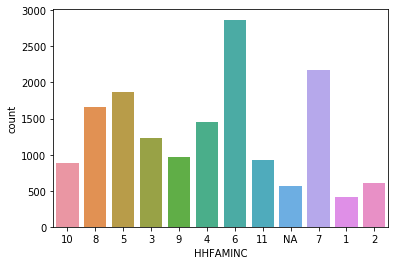

In [16]:
# Group all negative as 'NA'

print(pd.concat([ny['HHFAMINC'].value_counts(),
          ny['HHFAMINC'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

ny['HHFAMINC'][ny['HHFAMINC'].isin([-9,-8,-7])]  = "NA"

sns.countplot(data = ny, x= 'HHFAMINC')

### DRVRCNT

Pearson Corelation of:  0.8662732357377938 between DRVRCNT and NUMADLT. May remove one is too many variables


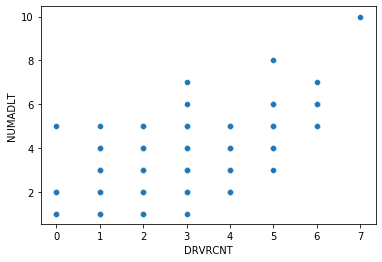

In [17]:

corr,_ = pearsonr(ny['DRVRCNT'],ny['NUMADLT'])
print("Pearson Corelation of: ",str(corr), "between DRVRCNT and NUMADLT. May remove one is too many variables")

sns.scatterplot(x = ny['DRVRCNT'], y = ny['NUMADLT'])
#

   counts  percentage
2    8176   52.289588
1    5849   37.407265
3    1187    7.591456
4     316    2.020977
0      56    0.358148
5      44    0.281402
6       7    0.044768
7       1    0.006395
_______________________
new value counts for DRVRCNT
    counts  percentage
2     8176   52.289588
1     5849   37.407265
>2    1555    9.944999
0       56    0.358148


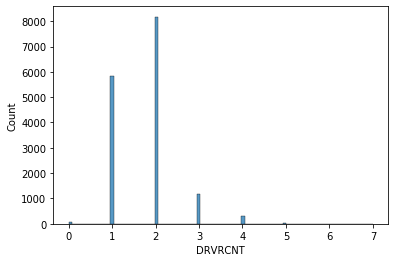

In [18]:
cat_col_prop(ny,'DRVRCNT')

# will bin those with >2 drivers together
ny['DRVRCNT'][ny['DRVRCNT']>2] = ">2"

print("_______________________")
print("new value counts for DRVRCNT")

print(pd.concat([ny['DRVRCNT'].value_counts(),
          ny['DRVRCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

In [19]:
# interestingly got 0.3% of the household got 0 drivers but have cars 
ny[ny['DRVRCNT']==0].describe() 

,HOUSEID,TRAVDAY,SAMPSTRAT,HHSIZE,PC,SPHONE,TAB,WALK,BIKE,CAR,...,WEBUSE17,SMPLSRCE,WTHHFIN,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,3.550968e+07,4.178571,2.714286,1.392857,2.607143,2.214286,2.839286,1.803571,2.553571,2.410714,...,2.321429,1.928571,328.238331,26.000000,2998.053571,1402.517857,999.839286,25.107143,3134.660714,1448.053571
std,5.075576e+06,1.973526,1.090693,0.845922,3.251174,4.305237,4.035194,4.730634,5.141346,1.474348,...,2.867417,0.259870,673.880020,17.964612,5539.648609,2823.995963,1461.105307,19.704802,5582.059093,2822.493961
min,3.008108e+07,1.000000,1.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-1.000000,...,-9.000000,1.000000,15.259318,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,3.032250e+07,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,2.000000,...,1.000000,2.000000,53.999105,16.250000,50.000000,50.000000,25.000000,5.000000,300.000000,50.000000
50%,4.007016e+07,4.000000,3.000000,1.000000,3.000000,5.000000,5.000000,4.000000,5.000000,2.000000,...,1.500000,2.000000,142.212181,20.000000,300.000000,300.000000,150.000000,20.000000,750.000000,300.000000
75%,4.039824e+07,6.000000,4.000000,1.250000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,...,5.000000,2.000000,290.463949,40.000000,3000.000000,1500.000000,1500.000000,40.000000,3000.000000,1500.000000
max,4.077127e+07,7.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,2.000000,3834.854389,70.000000,30000.000000,17000.000000,5000.000000,90.000000,30000.000000,17000.000000


In [20]:
print(pd.concat([ny['DRVRCNT'].value_counts(),
          ny['DRVRCNT'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

    counts  percentage
2     8176   52.289588
1     5849   37.407265
>2    1555    9.944999
0       56    0.358148


### NUMADLT / YOUNGCHILD / WRKCOUNT

    counts  percentage
2     8876   56.766436
1     5018   32.092607
3     1316    8.416475
4      348    2.225633
5       66    0.422103
6        8    0.051164
7        2    0.012791
8        1    0.006395
10       1    0.006395
      counts  percentage
1      12708   81.273983
>0.5    2419   15.470709
<0.5     509    3.255308


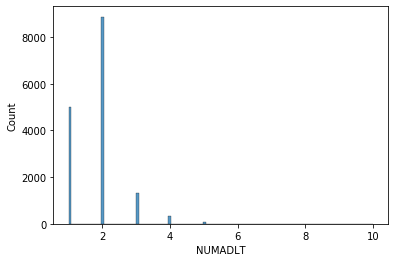

In [21]:
cat_col_prop(ny,'NUMADLT')

ny['NUMADLT'] = ny['NUMADLT']/ny['HHSIZE']

#Bin into groups
ny['NUMADLT_ratio'] = 'NA'

ny.loc[ny['NUMADLT']==0,'NUMADLT_ratio']= '0'
ny.loc[ny['NUMADLT'].between(0,0.5,inclusive = False),'NUMADLT_ratio'] = '<0.5'
ny.loc[ny['NUMADLT'].between(0.5,1, inclusive = True),'NUMADLT_ratio'] = '>0.5'
ny.loc[ny['NUMADLT']==1,'NUMADLT_ratio'] ='1'
 


print(pd.concat([ny['NUMADLT_ratio'].value_counts(),
          ny['NUMADLT_ratio'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )

   counts  percentage
0    5356   34.254285
1    5307   33.940906
2    4232   27.065746
3     586    3.747762
4     141    0.901765
5      12    0.076746
6       1    0.006395
7       1    0.006395
      counts  percentage
0       5356   34.254285
1       4893   31.293170
>0.5    3991   25.524431
<0.5    1396    8.928115


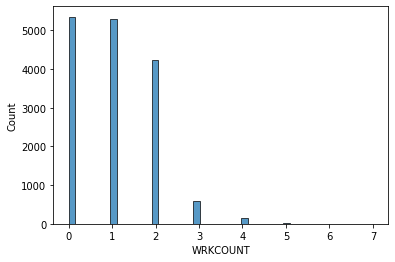

In [22]:
cat_col_prop(ny,'WRKCOUNT')

ny['WRKCOUNT'] = ny['WRKCOUNT']/ny['HHSIZE']


#Bin to groups
ny['WRKCOUNT_ratio'] = 'NA'
ny.loc[ny['WRKCOUNT']==0,'WRKCOUNT_ratio']= '0'
ny.loc[ny['WRKCOUNT'].between(0,0.5,inclusive = False),'WRKCOUNT_ratio'] = '<0.5'
ny.loc[ny['WRKCOUNT'].between(0.5,1, inclusive = True),'WRKCOUNT_ratio'] = '>0.5'
ny.loc[ny['WRKCOUNT']==1,'WRKCOUNT_ratio'] ='1'
 


print(pd.concat([ny['WRKCOUNT_ratio'].value_counts(),
          ny['WRKCOUNT_ratio'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )


   counts  percentage
0   14606   93.412638
1     750    4.796623
2     256    1.637247
3      22    0.140701
4       1    0.006395
5       1    0.006395
      counts  percentage
0      14606   93.412638
<0.5     817    5.225122
>0.5     213    1.362241


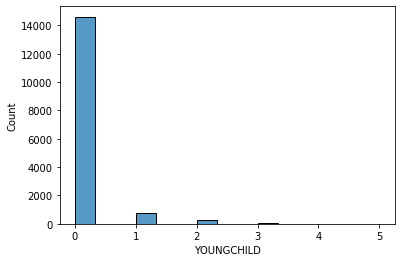

In [23]:
cat_col_prop(ny,'YOUNGCHILD')

ny['YOUNGCHILD'] = ny['YOUNGCHILD']/ny['HHSIZE']


#Bin to groups
ny['YOUNGCHILD_ratio'] = 'NA'
ny.loc[ny['YOUNGCHILD']==0,'YOUNGCHILD_ratio']= '0'
ny.loc[ny['YOUNGCHILD'].between(0,0.5,inclusive = False),'YOUNGCHILD_ratio'] = '<0.5'
ny.loc[ny['YOUNGCHILD'].between(0.5,1, inclusive = True),'YOUNGCHILD_ratio'] = '>0.5'
ny.loc[ny['YOUNGCHILD']==1,'YOUNGCHILD_ratio'] ='1'
 


print(pd.concat([ny['YOUNGCHILD_ratio'].value_counts(),
          ny['YOUNGCHILD_ratio'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )


    counts  percentage
10    4197   26.841903
2     3392   21.693528
1     2469   15.790483
9     2222   14.210796
6     1216    7.776925
4     1085    6.939115
8      604    3.862881
5      228    1.458173
7      131    0.837810
3       92    0.588386


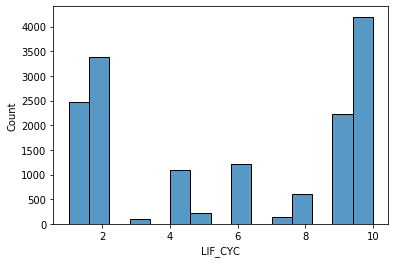

In [24]:
cat_col_prop(ny,'LIF_CYC')

### HHSIZE

    counts  percentage
2     6928   44.308007
1     4691   30.001279
3     1965   12.567153
4     1389    8.883346
5      467    2.986697
6      123    0.786646
7       44    0.281402
8       17    0.108723
9        7    0.044768
10       4    0.025582
11       1    0.006395
________
new HHSIZE
    counts  percentage
2     6928   44.308007
1     4691   30.001279
>3    2052   13.123561
3     1965   12.567153


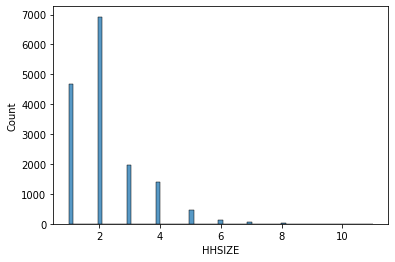

In [25]:

cat_col_prop(ny,'HHSIZE')

# to bin tail HHSIZE

ny['HHSIZE'][ny['HHSIZE']>3] = ">3"

print("________")
print("new HHSIZE")
print(pd.concat([ny['HHSIZE'].value_counts(),
          ny['HHSIZE'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
    )

### URBAN/ URBBUR/ URBANSIZE

   counts  percentage
1   10394   66.474802
2    5242   33.525198


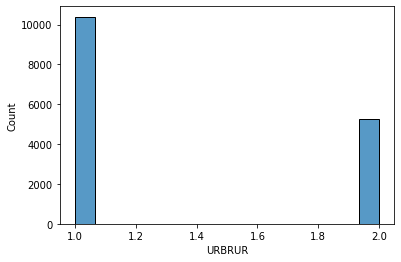

In [26]:

cat_col_prop(ny,'URBRUR')



   counts  percentage
6    6877   43.981837
5    2789   17.837043
1    2527   16.161422
3    1841   11.774111
2    1602   10.245587


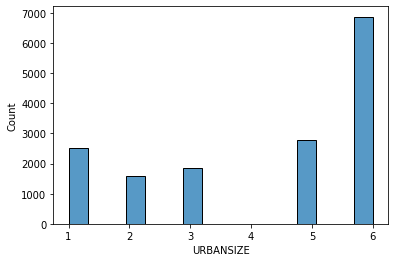

In [27]:
cat_col_prop(ny,'URBANSIZE')

In [28]:
# Final columns selected for HH

ny = ny[['HOUSEID','HH_CBSA','HOMEOWN','HHSIZE','HHVEHCNT','HHFAMINC','NUMADLT_ratio','YOUNGCHILD_ratio','WRKCOUNT_ratio','MSACAT','MSASIZE','URBAN','URBANSIZE','URBRUR','LIF_CYC']]


## 2. Trip

## key issue: Data leakage. 

1. Would be good if can somehow only get the driver trips only (remove duplicate passenger trips)

2. Should use like popular routes distances rather than the actual route info (e.g. think of what a new person if surveyed can answer on the spot) e.g. which route you frequent the most and how far is it

In [23]:
trip.head()

,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,30000007,1,1,1000,1015,15,5.244,3,0,0,...,20,750,300,50,750,300,350,30,300,300
1,30000007,1,2,1510,1530,20,5.149,3,0,0,...,30,300,300,50,1500,750,750,20,750,300
2,30000007,2,1,700,900,120,84.004,6,0,0,...,40,1500,750,50,1500,750,750,20,750,300
3,30000007,2,2,1800,2030,150,81.628,6,0,0,...,20,750,300,40,1500,750,750,40,1500,750
4,30000007,3,1,845,900,15,2.250,3,0,0,...,20,750,300,50,750,300,350,60,750,300


In [24]:
[c for c in trip.columns]

['HOUSEID',
 'PERSONID',
 'TDTRPNUM',
 'STRTTIME',
 'ENDTIME',
 'TRVLCMIN',
 'TRPMILES',
 'TRPTRANS',
 'TRPACCMP',
 'TRPHHACC',
 'VEHID',
 'TRWAITTM',
 'NUMTRANS',
 'TRACCTM',
 'DROP_PRK',
 'TREGRTM',
 'WHODROVE',
 'WHYFROM',
 'LOOP_TRIP',
 'TRPHHVEH',
 'HHMEMDRV',
 'HH_ONTD',
 'NONHHCNT',
 'NUMONTRP',
 'PSGR_FLG',
 'PUBTRANS',
 'TRIPPURP',
 'DWELTIME',
 'TDWKND',
 'VMT_MILE',
 'DRVR_FLG',
 'WHYTRP1S',
 'ONTD_P1',
 'ONTD_P2',
 'ONTD_P3',
 'ONTD_P4',
 'ONTD_P5',
 'ONTD_P6',
 'ONTD_P7',
 'ONTD_P8',
 'ONTD_P9',
 'ONTD_P10',
 'ONTD_P11',
 'ONTD_P12',
 'ONTD_P13',
 'TDCASEID',
 'TRACC_WLK',
 'TRACC_POV',
 'TRACC_BUS',
 'TRACC_CRL',
 'TRACC_SUB',
 'TRACC_OTH',
 'TREGR_WLK',
 'TREGR_POV',
 'TREGR_BUS',
 'TREGR_CRL',
 'TREGR_SUB',
 'TREGR_OTH',
 'WHYTO',
 'TRAVDAY',
 'HOMEOWN',
 'HHSIZE',
 'HHVEHCNT',
 'HHFAMINC',
 'DRVRCNT',
 'HHSTATE',
 'HHSTFIPS',
 'NUMADLT',
 'WRKCOUNT',
 'TDAYDATE',
 'HHRESP',
 'LIF_CYC',
 'MSACAT',
 'MSASIZE',
 'RAIL',
 'URBAN',
 'URBANSIZE',
 'URBRUR',
 'GASPRICE',
 'CE

In [25]:
trip = trip[['HOUSEID','PERSONID','TRAVDAY','TRPMILES','TRPHHVEH','TRPTRANS','WHYTRP1S','WHYTRP90','TRVLCMIN',
'TRWAITTM']]
ny_trip = trip[trip['HOUSEID'].isin(ny['HOUSEID'])]

In [26]:
ny_trip.shape

(113616, 10)

In [27]:
sum(ny_trip['TRWAITTM']<0)/ny_trip.shape[0]

0.982352837628503

### Trip Transport

In [28]:
ny_trip['TRPTRANS'].value_counts()
# TO CHECK 8 - do we want to count motorbike/mopeds as vehicles???
ny_trip = ny_trip[ny_trip['TRPTRANS'].isin([3,4,5,6,8])]


,counts,percentages
6,15094,15.530085
7,14306,14.719318
5,14099,14.506338
4,14081,14.487818
3,13809,14.207960
2,13625,14.018644
1,12178,12.529838


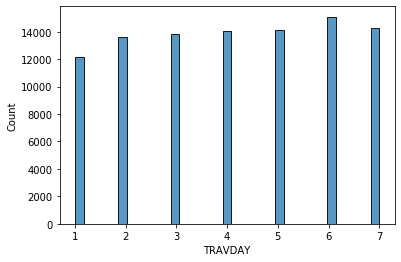

In [29]:
sns.histplot(ny_trip['TRAVDAY'])

pd.concat([ny_trip['TRAVDAY'].value_counts(),
           ny_trip['TRAVDAY'].value_counts(normalize = True).mul(100)],
          axis = 1, keys=('counts','percentages'))

## Why Trip

In [30]:
# since only 24 lines with trip distance <= 0, removed lines
print('# of trips with dist <=0', str(sum(ny_trip['TRPMILES']<=0)),' out of', str(len(ny_trip)))

ny_trip = ny_trip[ny_trip['TRPMILES']>0]

# of trips with dist <=0 24  out of 97192


In [31]:
purpose_summ = ny_trip.groupby(['HOUSEID','PERSONID','WHYTRP90']).agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           ).unstack().reset_index()

In [32]:
ny_trip.groupby(['HOUSEID','PERSONID','WHYTRP90']).agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0]),
                                            skew = ('TRPMILES','skew'),
                                            count = ('TRPMILES','count')
                                           )

avg      med     mod      skew  count
HOUSEID  PERSONID WHYTRP90                                            
30000012 1        1          7.95250   7.9525   6.818       NaN      2
                  2          4.29100   4.2910   4.291       NaN      1
                  8         48.87900  48.8790  49.457       NaN      2
                  10         2.21575   2.2270   3.395 -0.000946      4
30000082 1        1          1.75200   1.7520   0.777       NaN      2
...                              ...      ...     ...       ...    ...
40793974 1        10         3.62175   3.6370   3.496 -0.073407      4
40794020 1        3          5.26600   5.2660   5.266       NaN      2
                  4          0.83600   0.8360   0.836       NaN      2
         2        3          5.30200   5.3020   5.302       NaN      1
                  6         18.71050  18.7105  22.182       NaN      2

[48292 rows x 5 columns]

In [33]:
ny_trip[['TRPMILES','HOUSEID','PERSONID']][ny_trip['WHYTRP90']==1].groupby(['HOUSEID','PERSONID']).agg(avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           )

avg      med     mod
HOUSEID  PERSONID                          
30000012 1          7.9525   7.9525   6.818
30000082 1          1.7520   1.7520   0.777
30000380 2          1.1815   1.1815   1.191
30000436 1          1.2465   1.2465   0.678
30000439 4          0.0815   0.0815   0.082
...                    ...      ...     ...
40792484 1          2.5350   2.5350   2.535
40792552 1          9.6435   9.6435   9.771
         2         10.6285  10.6285  10.949
40793555 3          1.5440   1.5440   2.140
         4         20.2440  20.2440  20.688

[8125 rows x 3 columns]

In [34]:
purpose_summ

HOUSEID PERSONID     avg                                   \
WHYTRP90                          1          2         3       4   5   
0         30000012        1  7.9525   4.291000       NaN     NaN NaN   
1         30000082        1  1.7520        NaN       NaN  1.8925 NaN   
2         30000082        2     NaN  34.280667  2.136000     NaN NaN   
3         30000380        1     NaN        NaN  1.896667     NaN NaN   
4         30000380        2  1.1815        NaN  1.896667     NaN NaN   
...            ...      ...     ...        ...       ...     ...  ..   
24432     40793808        2     NaN        NaN  3.048000  4.4740 NaN   
24433     40793808        3     NaN        NaN  4.068750     NaN NaN   
24434     40793974        1     NaN        NaN  6.609500     NaN NaN   
24435     40794020        1     NaN        NaN  5.266000  0.8360 NaN   
24436     40794020        2     NaN        NaN  5.302000     NaN NaN   

                                       ...    mod                            \
WHYTRP90          6       8        10  ...      1       2      3      4   5   
0               NaN  48.879   2.21575  ...  6.818   4.291    NaN    NaN NaN   
1               NaN     NaN   1.43200  ...  0.777     NaN    NaN  1.075 NaN   
2               NaN     NaN  88.58100  ...    NaN  29.293  2.136    NaN NaN   
3               NaN     NaN       NaN  ...    NaN     NaN  0.713    NaN NaN   
4          2.206333     NaN       NaN  ...  1.191     NaN  0.713    NaN NaN   
...             ...     ...       ...  ...    ...     ...    ...    ...  ..   
24432           NaN     NaN   1.81450  ...    NaN     NaN  2.243  5.435 NaN   
24433           NaN     NaN   0.88400  ...    NaN     NaN  5.868    NaN NaN   
24434           NaN   5.018   3.62175  ...    NaN     NaN  5.139    NaN NaN   
24435           NaN     NaN       NaN  ...    NaN     NaN  5.266  0.836 NaN   
24436     18.710500     NaN       NaN  ...    NaN     NaN  5.302    NaN NaN   

                                          
WHYTRP90       6       8      10  11  99  
0            NaN  49.457   3.395 NaN NaN  
1            NaN     NaN   1.432 NaN NaN  
2            NaN     NaN  88.581 NaN NaN  
3            NaN     NaN     NaN NaN NaN  
4          3.318     NaN     NaN NaN NaN  
...          ...     ...     ...  ..  ..  
24432        NaN     NaN   2.745 NaN NaN  
24433        NaN     NaN   0.884 NaN NaN  
24434        NaN   5.018   3.496 NaN NaN  
24435        NaN     NaN     NaN NaN NaN  
24436     22.182     NaN     NaN NaN NaN  

[24437 rows x 32 columns]

In [35]:
ny_trip['hh_person_id'] = ny_trip['HOUSEID'].astype('str')+'-'+ ny_trip['PERSONID'].astype('str')


In [36]:
ny_trip['hh_person_id']

8         30000012-1
9         30000012-1
10        30000012-1
11        30000012-1
12        30000012-1
             ...    
923363    40794020-1
923364    40794020-1
923367    40794020-2
923368    40794020-2
923369    40794020-2
Name: hh_person_id, Length: 97168, dtype: object

In [37]:
why = ny_trip.groupby(['hh_person_id','WHYTRP90']).agg(#avg = ('TRPMILES','mean'),
                                            med = ('TRPMILES', 'median'),
                                        #mod  = ('TRPMILES', lambda x: x.value_counts().index[0])
                                           ).unstack().reset_index()

In [38]:
[c for c in why]

[('hh_person_id', ''),
 ('med', 1),
 ('med', 2),
 ('med', 3),
 ('med', 4),
 ('med', 5),
 ('med', 6),
 ('med', 8),
 ('med', 10),
 ('med', 11),
 ('med', 99)]

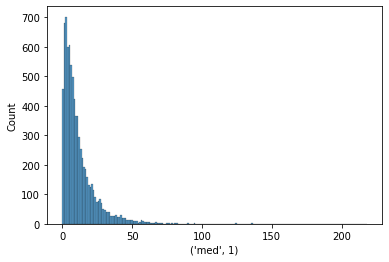

In [39]:
sns.histplot(why[('med',1)])

In [40]:
why

hh_person_id     med                                               \
WHYTRP90                    1       2       3       4   5        6       8   
0          30000012-1  7.9525   4.291     NaN     NaN NaN      NaN  48.879   
1          30000082-1  1.7520     NaN     NaN  1.8925 NaN      NaN     NaN   
2          30000082-2     NaN  29.293  2.1360     NaN NaN      NaN     NaN   
3          30000380-1     NaN     NaN  2.2100     NaN NaN      NaN     NaN   
4          30000380-2  1.1815     NaN  2.2100     NaN NaN   1.9610     NaN   
...               ...     ...     ...     ...     ...  ..      ...     ...   
24432      40793808-2     NaN     NaN  2.2430  4.4740 NaN      NaN     NaN   
24433      40793808-3     NaN     NaN  4.9635     NaN NaN      NaN     NaN   
24434      40793974-1     NaN     NaN  6.6095     NaN NaN      NaN   5.018   
24435      40794020-1     NaN     NaN  5.2660  0.8360 NaN      NaN     NaN   
24436      40794020-2     NaN     NaN  5.3020     NaN NaN  18.7105     NaN   

                           
WHYTRP90       10  11  99  
0          2.2270 NaN NaN  
1          1.4320 NaN NaN  
2         88.5810 NaN NaN  
3             NaN NaN NaN  
4             NaN NaN NaN  
...           ...  ..  ..  
24432      1.8145 NaN NaN  
24433      0.8840 NaN NaN  
24434      3.6370 NaN NaN  
24435         NaN NaN NaN  
24436         NaN NaN NaN  

[24437 rows x 11 columns]

In [41]:
why_col = why.columns

In [42]:
new  = pd.DataFrame()
for i in range(1, len(why.columns)):
    new[why_col[i]] = ~np.isnan(why.iloc[:,i])

In [43]:
chart_data = new.stack().reset_index()
chart_data

,level_0,level_1,0
0,0,"(med, 1)",True
1,0,"(med, 2)",True
2,0,"(med, 3)",False
3,0,"(med, 4)",False
4,0,"(med, 5)",False
...,...,...,...
244365,24436,"(med, 6)",True
244366,24436,"(med, 8)",False
244367,24436,"(med, 10)",False
244368,24436,"(med, 11)",False


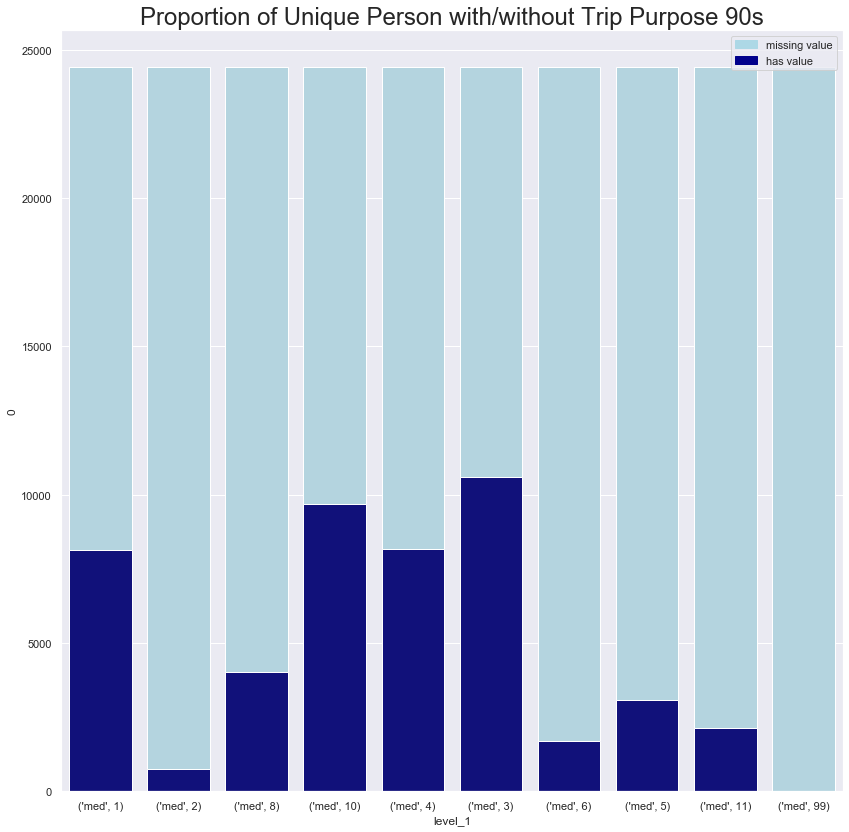

In [44]:
import matplotlib.patches as mpatches

sns.set(style="darkgrid")
plt.figure(figsize=(14, 14))

full_data = chart_data.groupby('level_1')[0].count().reset_index()

bar1= sns.barplot(data = full_data, x = "level_1", y = 0, color = 'lightblue')

has_value = chart_data[chart_data[0]==True]

bar2 = sns.barplot(data = has_value, estimator = sum, ci = None, x = "level_1", y = 0, color = 'darkblue')

bottom_bar = mpatches.Patch(color = 'darkblue', label = 'has value')
top_bar = mpatches.Patch(color = 'lightblue', label = 'missing value')

plt.title('Proportion of Unique Person with/without Trip Purpose 90s', fontsize = 24)
plt.legend(handles = [top_bar, bottom_bar])
plt.show()

## Instead use feature cross of most common reason x dist cat for that reason

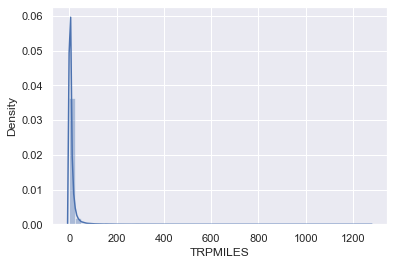

In [45]:
sns.distplot(ny_trip['TRPMILES'])

In [46]:
ny_trip[ny_trip['TRPMILES']> 200]

,HOUSEID,PERSONID,TRAVDAY,TRPMILES,TRPHHVEH,TRPTRANS,WHYTRP1S,WHYTRP90,TRVLCMIN,TRWAITTM,hh_person_id
6354,30007462,1,2,386.648,1,3,1,8,440,-1,30007462-1
6360,30007462,2,2,389.762,1,3,1,8,440,-1,30007462-2
17581,30020018,1,4,307.460,1,5,1,10,365,-1,30020018-1
18764,30021241,1,5,306.353,1,3,40,3,335,-1,30021241-1
20651,30023489,1,7,260.981,1,4,50,8,305,-1,30023489-1
...,...,...,...,...,...,...,...,...,...,...,...
894684,40737760,2,1,207.956,1,3,10,2,240,-1,40737760-2
896928,40742011,1,1,228.669,1,6,1,11,270,-1,40742011-1
896929,40742011,2,1,228.669,1,6,1,11,270,-1,40742011-2
920681,40788901,1,5,273.158,1,3,1,3,225,-1,40788901-1


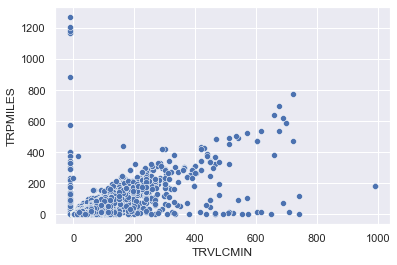

In [47]:
sns.scatterplot(data = ny_trip, x='TRVLCMIN', y = 'TRPMILES')

In [48]:
ny_trip[(ny_trip['TRVLCMIN']<100) & (ny_trip['TRPMILES']>100)]

,HOUSEID,PERSONID,TRAVDAY,TRPMILES,TRPHHVEH,TRPTRANS,WHYTRP1S,WHYTRP90,TRVLCMIN,TRWAITTM,hh_person_id
38630,30042582,1,2,224.420,1,4,40,3,-9,-1,30042582-1
38631,30042582,1,2,222.529,1,4,40,3,-9,-1,30042582-1
38640,30042582,3,2,232.717,1,4,40,3,-9,-1,30042582-3
38641,30042582,3,2,222.529,1,4,40,3,-9,-1,30042582-3
52901,30058065,1,2,137.565,1,3,40,3,95,-1,30058065-1
...,...,...,...,...,...,...,...,...,...,...,...
784688,40530824,3,1,102.089,1,3,1,10,85,-1,40530824-3
798326,40556200,2,5,333.349,1,4,50,8,-9,-1,40556200-2
798327,40556200,2,5,330.457,1,4,40,3,-9,-1,40556200-2
845025,40645089,1,7,175.873,2,3,50,8,-9,-1,40645089-1


In [49]:
print(str(sum(ny_trip['TRVLCMIN']<=0)), ' trips missing TRVLCMIN info so will just remove since only ',str(sum(ny_trip['TRVLCMIN']<=0)/len(ny_trip)*100),"%")

98  trips missing TRVLCMIN info so will just remove since only  0.1008562489708546 %


In [50]:
ny_trip = ny_trip[ny_trip['TRVLCMIN']>0]

In [51]:
#bin distances to 5 groups (qcut)

ny_trip['trip distance bins'] = pd.qcut(ny_trip['TRPMILES'],5)

In [52]:
ny_trip.groupby('hh_person_id').agg({'WHYTRP90':pd.Series.mode})


# NEED HELP HERE WANT TO GET THE MODE WHY and then the MODE distance for the respective WHY for that person 
# e.g. Person A - work - 100 mile
#      Person B - school - 1 mile
#      Person C - work - 10 mile

,WHYTRP90
hh_person_id,
30000012-1,10
30000082-1,"[1, 4]"
30000082-2,2
30000380-1,3
30000380-2,"[3, 6]"
...,...
40793808-2,3
40793808-3,3
40793974-1,10


In [53]:
## For Trip To me only the above feature cross or if want to do like urbanness of dest can also take via similiar approach e.g. the urbaness of the most common why

## 3. People

In [29]:
[c for c in person]

['HOUSEID',
 'PERSONID',
 'R_AGE',
 'EDUC',
 'R_HISP',
 'R_RELAT',
 'R_SEX',
 'R_RACE',
 'PRMACT',
 'PAYPROF',
 'GT1JBLWK',
 'WRK_HOME',
 'WKFTPT',
 'WRKTRANS',
 'LSTTRDAY17',
 'OCCAT',
 'SCHTYP',
 'NWALKTRP',
 'WALK4EX',
 'NBIKETRP',
 'BIKE4EX',
 'BIKESHARE',
 'PTUSED',
 'MCUSED',
 'CARSHARE',
 'RIDESHARE',
 'CARRODE',
 'TIMETOWK',
 'NOCONG',
 'PUBTIME',
 'WRKTIME',
 'WKRMHM',
 'FLEXTIME',
 'WKFMHMXX',
 'SCHTRN1',
 'SCHTRN2',
 'DELIVER',
 'MEDCOND',
 'MEDCOND6',
 'HEALTH',
 'PHYACT',
 'VPACT',
 'LPACT',
 'BORNINUS',
 'YRTOUS',
 'YEARMILE',
 'PROXY',
 'WHOPROXY',
 'USEPUBTR',
 'SAMEPLC',
 'W_NONE',
 'W_CANE',
 'W_WLKR',
 'W_WHCANE',
 'W_DOG',
 'W_CRUTCH',
 'W_SCOOTR',
 'W_CHAIR',
 'W_MTRCHR',
 'WORKER',
 'DIARY',
 'OUTCNTRY',
 'FRSTHM17',
 'CNTTDTR',
 'GCDWORK',
 'WKSTFIPS',
 'DRIVER',
 'OUTOFTWN',
 'DISTTOWK17',
 'DISTTOSC17',
 'R_AGE_IMP',
 'R_SEX_IMP',
 'ALT_16',
 'ALT_23',
 'ALT_45',
 'WALK_DEF',
 'WALK_GKQ',
 'BIKE_DFR',
 'BIKE_GKP',
 'CONDTRAV',
 'CONDRIDE',
 'CONDNIGH',
 'CONDRI

In [30]:
# Fitlering NY Drivers only

nyorker = person[(person['HOUSEID'].isin(ny['HOUSEID'])) & (person['DRIVER']==1)]

In [31]:
nyorker['hh_person_id'] = nyorker['HOUSEID'].astype('str') + '-' + nyorker['PERSONID'].astype('str')

In [32]:
[c for c in person]

['HOUSEID',
 'PERSONID',
 'R_AGE',
 'EDUC',
 'R_HISP',
 'R_RELAT',
 'R_SEX',
 'R_RACE',
 'PRMACT',
 'PAYPROF',
 'GT1JBLWK',
 'WRK_HOME',
 'WKFTPT',
 'WRKTRANS',
 'LSTTRDAY17',
 'OCCAT',
 'SCHTYP',
 'NWALKTRP',
 'WALK4EX',
 'NBIKETRP',
 'BIKE4EX',
 'BIKESHARE',
 'PTUSED',
 'MCUSED',
 'CARSHARE',
 'RIDESHARE',
 'CARRODE',
 'TIMETOWK',
 'NOCONG',
 'PUBTIME',
 'WRKTIME',
 'WKRMHM',
 'FLEXTIME',
 'WKFMHMXX',
 'SCHTRN1',
 'SCHTRN2',
 'DELIVER',
 'MEDCOND',
 'MEDCOND6',
 'HEALTH',
 'PHYACT',
 'VPACT',
 'LPACT',
 'BORNINUS',
 'YRTOUS',
 'YEARMILE',
 'PROXY',
 'WHOPROXY',
 'USEPUBTR',
 'SAMEPLC',
 'W_NONE',
 'W_CANE',
 'W_WLKR',
 'W_WHCANE',
 'W_DOG',
 'W_CRUTCH',
 'W_SCOOTR',
 'W_CHAIR',
 'W_MTRCHR',
 'WORKER',
 'DIARY',
 'OUTCNTRY',
 'FRSTHM17',
 'CNTTDTR',
 'GCDWORK',
 'WKSTFIPS',
 'DRIVER',
 'OUTOFTWN',
 'DISTTOWK17',
 'DISTTOSC17',
 'R_AGE_IMP',
 'R_SEX_IMP',
 'ALT_16',
 'ALT_23',
 'ALT_45',
 'WALK_DEF',
 'WALK_GKQ',
 'BIKE_DFR',
 'BIKE_GKP',
 'CONDTRAV',
 'CONDRIDE',
 'CONDNIGH',
 'CONDRI

In [33]:
nyorker = nyorker[['HOUSEID','PERSONID','R_AGE','EDUC','R_RACE','R_SEX','WRK_HOME','WKFTPT','OCCAT','DRIVER']]

## Age

In [34]:
print(str(sum(nyorker['R_AGE']<0)), "count of people with no age. ",str(sum(nyorker['R_AGE']<0)/person.shape[0]),"%. Prolly can remove")

52 count of people with no age.  0.00019679526480316688 %. Prolly can remove


     counts  percentage
 65     780    2.857666
 64     725    2.656164
 60     719    2.634182
 62     717    2.626855
 63     698    2.557245
..      ...         ...
 86      99    0.362704
 87      99    0.362704
 88      73    0.267448
-7       44    0.161202
-8        8    0.029309

[76 rows x 2 columns]

394 people below the age of 18 0.014434878182817365 %


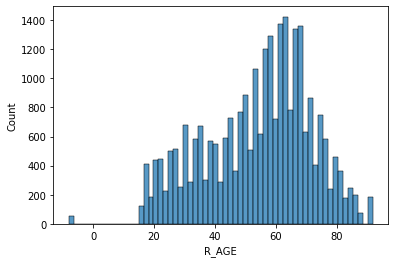

In [35]:
print(pd.concat([nyorker['R_AGE'].value_counts(),
          nyorker['R_AGE'].value_counts(normalize = True).mul(100)],axis = 1, keys = ('counts','percentage'))
     )
print('')
print(str(sum(nyorker['R_AGE']<18)), 'people below the age of 18', str(sum(nyorker['R_AGE']<18)/len(nyorker['R_AGE'])),"%")


sns.histplot(nyorker['R_AGE'])

# Interesting that a lot of the respondants are older but dont think need to change
# possibly something to do with the fact that the survey was done via landline calls??

## EDUC

    counts  percentage
 3    7620   27.917201
 5    7059   25.861879
 4    6044   22.143250
 2    5623   20.600843
 1     931    3.410881
-7      15    0.054955
-8       3    0.010991


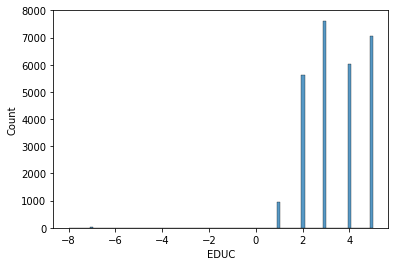

In [36]:
cat_col_prop(nyorker,'EDUC',)

     counts  percentage
 1    24886   91.174208
 3      754    2.762411
 2      712    2.608536
 6      436    1.597362
 97     279    1.022165
-7      132    0.483605
 4       66    0.241803
 5       19    0.069610
-8       11    0.040300


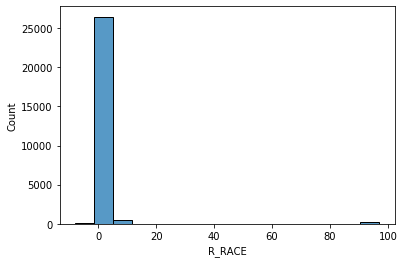

In [37]:
cat_col_prop(nyorker,'R_RACE')

# High proporition of white

    counts  percentage
 2   14163   51.888624
 1   13110   48.030775
-7      20    0.073273
-8       2    0.007327


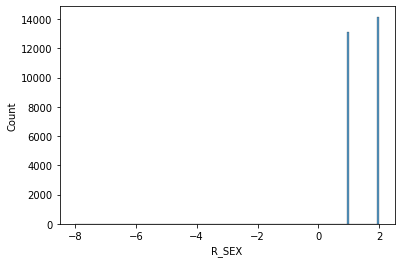

In [38]:
cat_col_prop(nyorker,'R_SEX')

    counts  percentage
 2   13423   49.177505
-1   11554   42.330097
 1    1694    6.206265
-9     623    2.282469
-7       1    0.003664
prolly split -1: not working, 2:No, 1: Yes


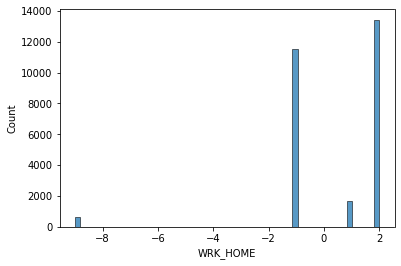

In [39]:
cat_col_prop(nyorker,'WRK_HOME')

print('prolly split -1: not working, 2:No, 1: Yes')

    counts  percentage
-1   12177   44.612566
 1   11807   43.257007
 2    3302   12.097454
-7       7    0.025646
-8       2    0.007327
similiar regarding the non workers 51%


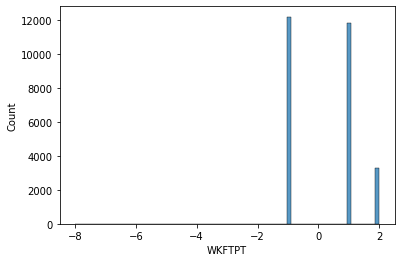

In [40]:
cat_col_prop(nyorker,'WKFTPT')

print('similiar regarding the non workers 51%')

     counts  percentage
-1    11554   42.330097
 4     8417   30.837150
 1     3118   11.423338
 3     1826    6.689870
 2     1731    6.341821
-9      623    2.282469
 97      18    0.065946
-8        5    0.018318
-7        3    0.010991
similiar not working


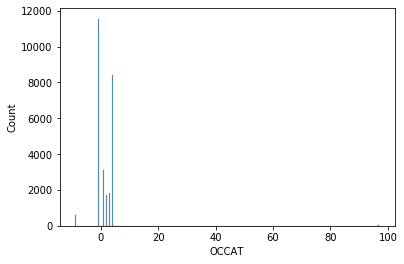

In [41]:
cat_col_prop(nyorker,'OCCAT')
print('similiar not working')

In [47]:
df = nyorker.merge(ny, how='left', left_on = 'HOUSEID', right_on = 'HOUSEID')
df

,HOUSEID,PERSONID,R_AGE,EDUC,R_RACE,R_SEX,WRK_HOME,WKFTPT,OCCAT,DRIVER,...,HHFAMINC,NUMADLT_ratio,YOUNGCHILD_ratio,WRKCOUNT_ratio,MSACAT,MSASIZE,URBAN,URBANSIZE,URBRUR,LIF_CYC
0,30000012,1,45,5,1,2,2,1,4,1,...,10,1,0,1,3,3,1,3,1,1
1,30000082,1,39,5,1,2,2,1,2,1,...,8,>0.5,>0.5,>0.5,3,3,1,3,1,4
2,30000082,2,38,4,1,1,2,1,4,1,...,8,>0.5,>0.5,>0.5,3,3,1,3,1,4
3,30000130,1,45,5,1,2,2,1,2,1,...,5,1,0,1,1,5,1,5,1,2
4,30000130,2,45,4,1,1,2,1,2,1,...,5,1,0,1,1,5,1,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27290,40793808,1,59,4,1,1,1,2,4,1,...,7,>0.5,0,>0.5,3,1,1,1,1,8
27291,40793808,2,50,4,1,2,2,1,4,1,...,7,>0.5,0,>0.5,3,1,1,1,1,8
27292,40793974,1,81,2,1,1,-1,-1,-1,1,...,3,1,0,0,3,1,1,1,1,9
27293,40794020,1,75,3,1,1,-1,-1,-1,1,...,8,1,0,0,4,6,4,6,2,10


In [48]:
df.shape

(27295, 24)

In [ ]:
# Merge with Trips to get the Y